<a href="https://colab.research.google.com/github/niloydebbarma-code/REG-Handbook/blob/main/project6_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
#plt.rc('text', usetex=True)
plt.rc('font', family='serif')

If we want to save our data to google drive, we have to connect our Python notebook to our google drive account! Running this will ask us to confirm that we want this notebook to be able to access drive. This will also make a folder called 'Python4Physics' in your google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!mkdir -p "/content/drive/My Drive/Python4Physics"
filepath="drive/My Drive/Python4Physics/"

Mounted at /content/drive


First, let's define some basic functions:

In [ ]:
pi= np.pi

def sqrt(x): return np.sqrt(x) # square root
def exp(x): return np.exp(x) # exponential
def sin(x): return np.sin(x) # sine curve
def cos(x): return np.cos(x) # cosine curve
def log(x): return np.log(x) # logarithm
def poly0(x): return (pow(x,3)/6.) + (pow(x,4)/8.0) # polynomial (combination of powers)

# Exercise #1: Defining the derivative

In [ ]:
import numpy as np

def derivative(f, x, a):
    """
    Returns the numerical derivative of a function f at point x using a small value a.
    """
    return (f(x + a) - f(x - a)) / (2 * a)

# Example usage with f(x) = x^2
f = lambda x: x**2
x = 1
a = 1e-5
deriv = derivative(f, x, a)
print(f"The derivative of x^2 at x={x} is approximately: {deriv}")

The derivative of x^2 at x=1 is approximately: 2.000000000002


You can play around with this to understand the impact of changing "a" -- finer "resolution" gets more accurate results.

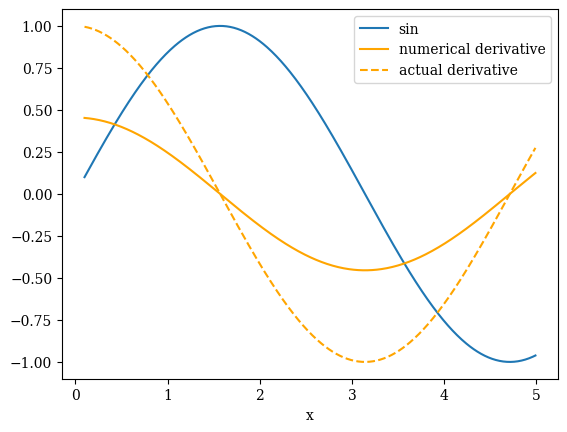

In [ ]:
x = np.arange(0.1, 5, 0.01)

a = 2 # try values between 0.1 and 2

# define sine function
def sin(x):
  f = np.sin(x)
  return f

# take the derivative
dsin = fin_deriv(sin, x, a)

plt.plot(x, np.sin(x), label="sin")
plt.plot(x, dsin, color='orange', label = "numerical derivative")
plt.plot(x, np.cos(x), '--', color='orange', label="actual derivative")
plt.xlabel('x')
plt.legend()
plt.show()

# Exercise #2: Test convergence

Now let's make some plots as a function of the resolution "a" and see what our error function looks like.

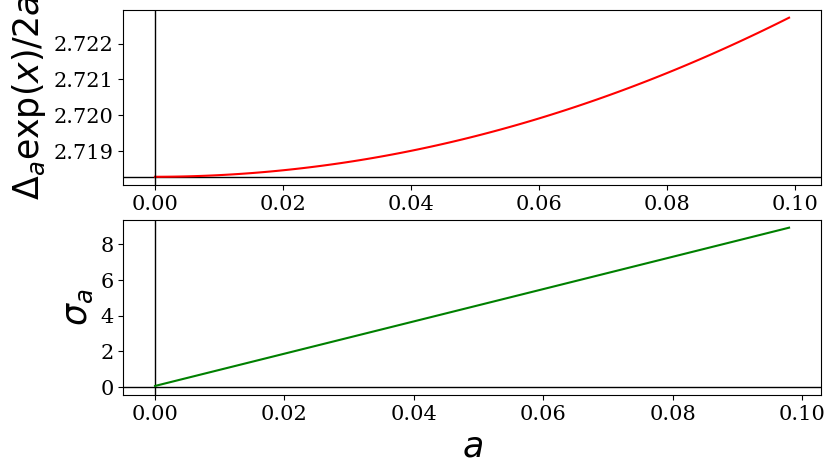

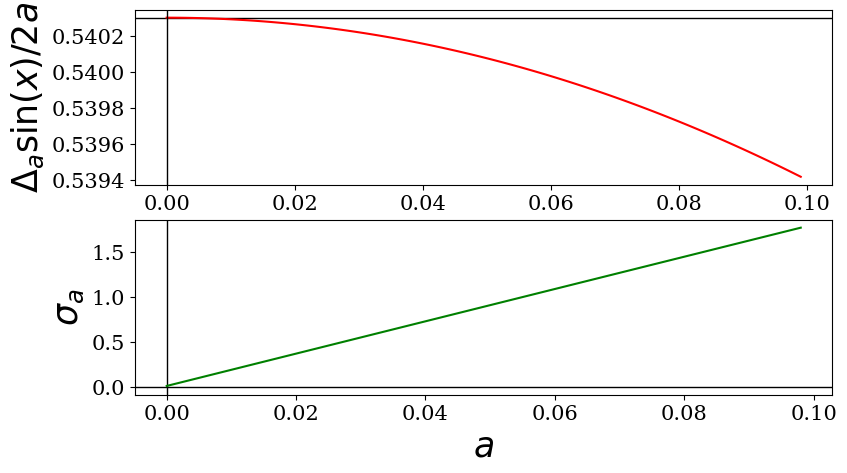

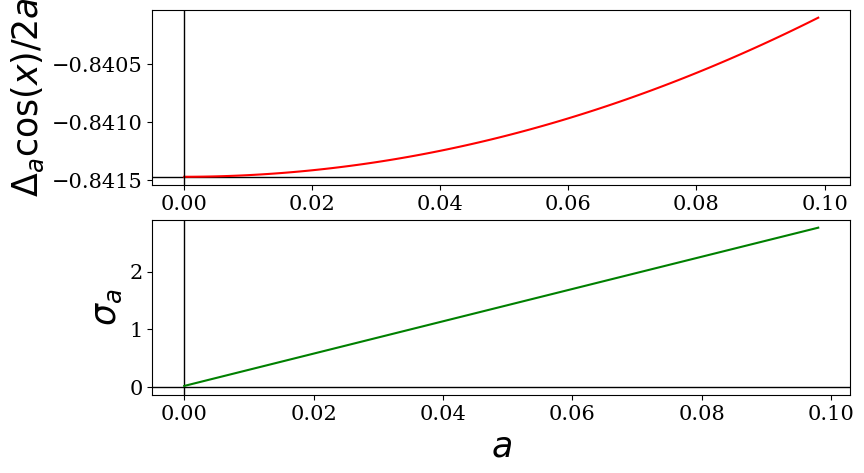

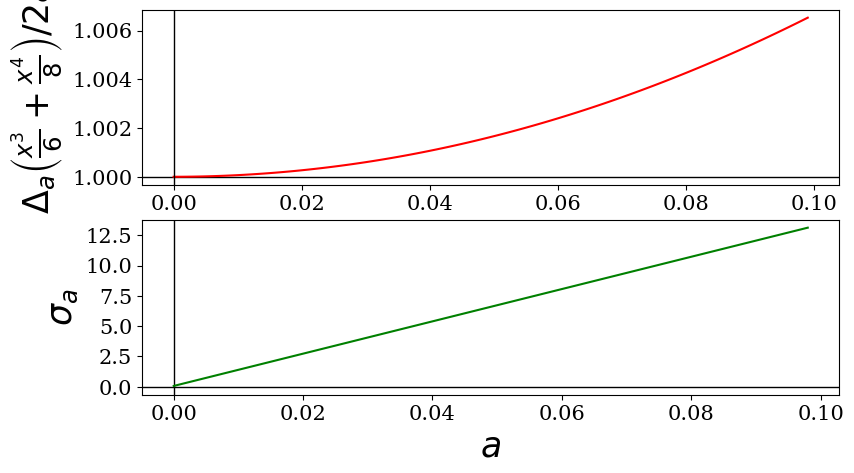

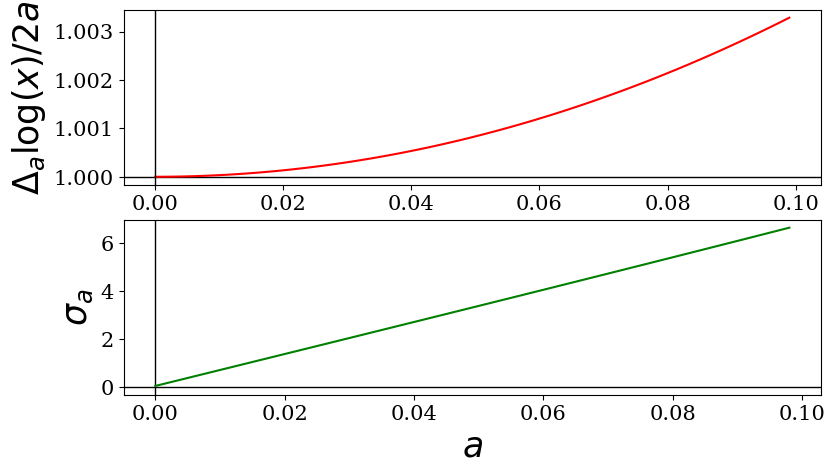

In [ ]:
# Define the derivative function
def fin_deriv(f, x, a):
    """
    Numerically calculates the derivative of function f at point x using a small value a.
    """
    return (f(x + a) - f(x - a)) / (2 * a)

# Define the error function
def error_fun(Xvec, Yvec):
    """
    This function takes a dependent variable (in our case, the derivative) and
    an independent variable (in our case, 'a') and returns the error function.
    """
    num = Yvec[0:-1] - Yvec[1:]
    dnum = Xvec[0:-1] - Xvec[1:]
    Ytmp = 100 * abs(num / dnum)
    Xtmp = Xvec[0:-1]
    return Xtmp, Ytmp

# Plotting function
def master_plot_vs_a(ydata1, ydata2, ydata3, ylabel1, ylabel2, xlabel0):
    """
    Formats and displays the plots.
    """
    plt.figure(figsize=(9.0, 5))

    # Upper plot
    plt.subplot(211)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.ylabel(ylabel1, size=25)
    plt.axhline(y=ydata2, color='k', linewidth=1)
    plt.plot(a, ydata1, color='r')
    plt.axvline(x=0, color='k', linewidth=1)

    # Lower plot
    plt.subplot(212)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.axhline(y=0, color='k', linewidth=1)
    plt.axvline(x=0, color='k', linewidth=1)
    plt.ylabel(ylabel2, size=25)
    plt.plot(xtmp, ydata3, color='g')
    plt.xlabel(xlabel0, size=25, position=(1, 1.2))
    plt.show()

# Define the polynomial function for the polynomial test case
def poly0(x):
    return (x**3) / 6 + (x**4) / 8

# Set up range of 'a' values
x = 1
a = np.arange(1e-5, 0.1, 1e-3)

"""
******************************
    Exponential Function
******************************
"""
# Calculate the derivative and error
dexp = fin_deriv(np.exp, x, a)
xtmp, Ytmp = error_fun(a, dexp)

# Plot for exp(x)
ydata1 = dexp
ydata2 = np.exp(x)
ydata3 = Ytmp
ylabel1 = r'$\Delta_a \exp(x) / 2a$'
ylabel2 = r'$\sigma_a$'
xlabel0 = r'$a$'

master_plot_vs_a(ydata1, ydata2, ydata3, ylabel1, ylabel2, xlabel0)

"""
******************************
    Sin Function
******************************
"""
dsin = fin_deriv(np.sin, x, a)
xtmp, Ytmp = error_fun(a, dsin)

# Plot for sin(x)
ydata1 = dsin
ydata2 = np.cos(x)
ydata3 = Ytmp
ylabel1 = r'$\Delta_a \sin(x) / 2a$'
ylabel2 = r'$\sigma_a$'
xlabel0 = r'$a$'

master_plot_vs_a(ydata1, ydata2, ydata3, ylabel1, ylabel2, xlabel0)

"""
******************************
    Cos Function
******************************
"""
dcos = fin_deriv(np.cos, x, a)
xtmp, Ytmp = error_fun(a, dcos)

# Plot for cos(x)
ydata1 = dcos
ydata2 = -np.sin(x)
ydata3 = Ytmp
ylabel1 = r'$\Delta_a \cos(x) / 2a$'
ylabel2 = r'$\sigma_a$'
xlabel0 = r'$a$'

master_plot_vs_a(ydata1, ydata2, ydata3, ylabel1, ylabel2, xlabel0)

"""
******************************
    Polynomial Function
******************************
"""
dx = fin_deriv(poly0, x, a)
xtmp, Ytmp = error_fun(a, dx)

# Plot for polynomial
ydata1 = dx
ydata2 = np.ones_like(x)
ydata3 = Ytmp
ylabel1 = r'$\Delta_a \left(\frac{x^3}{6} + \frac{x^4}{8}\right) / 2a$'
ylabel2 = r'$\sigma_a$'
xlabel0 = r'$a$'

master_plot_vs_a(ydata1, ydata2, ydata3, ylabel1, ylabel2, xlabel0)

"""
******************************
    Logarithmic Function
******************************
"""
dlog = fin_deriv(np.log, x, a)
xtmp, Ytmp = error_fun(a, dlog)

# Plot for log(x)
ydata1 = dlog
ydata2 = 1.0 / x
ydata3 = Ytmp
ylabel1 = r'$\Delta_a \log(x) / 2a$'
ylabel2 = r'$\sigma_a$'
xlabel0 = r'$a$'

master_plot_vs_a(ydata1, ydata2, ydata3, ylabel1, ylabel2, xlabel0)

# Exercise #3: Plotting derivatives and comparing to expectations

Let's make some plots as a function of the variable "x"

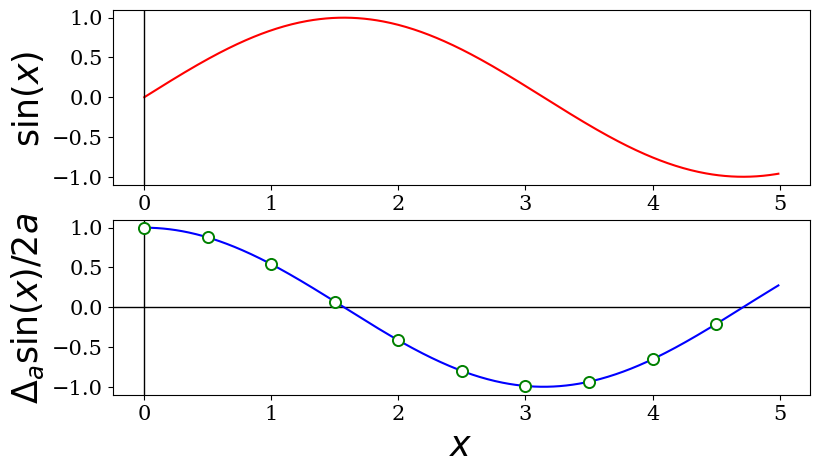

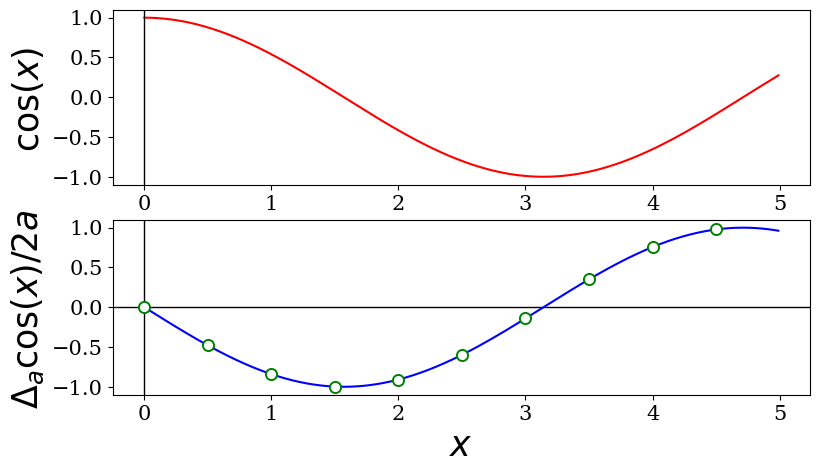

In [ ]:
def master_plot_vs_x():

  """ This will format our plots for us, so we don't have to type this out every time. """

  plt.figure(figsize=(9.0,5))
  plt.subplot(211)
  plt.xticks(fontsize=15)
  plt.yticks(fontsize=15)

  plt.ylabel(ylabel1,size=25)
  plt.plot(x, ydata1, color='r')
  plt.axvline(x=0,color='k',linewidth=1)

  plt.subplot(212)
  plt.xticks(fontsize=15)
  plt.yticks(fontsize=15)

  plt.axhline(y=0,color='k',linewidth=1)
  plt.axvline(x=0,color='k',linewidth=1)

  plt.ylabel(ylabel2,size=25)
  plt.plot(x, ydata2, color='b')
  plt.errorbar(x2, ydata3,  markersize=8,fmt='o',color='g',mfc='white',mec='g', elinewidth=2, capsize=4, mew=1.4)

  plt.xlabel(xlabel0,size=25, position=(1,1.2))
  plt.show()

a = pow(10,-3)

x=np.arange(0,5,.01)
x2=np.arange(0,5,.5)


"""
******************************
******************************
    sin
******************************
******************************
"""

# take the derivative
dsin = fin_deriv(sin, x, a)

# plot
ydata1 = sin(x)
ydata2 = dsin
ydata3 = cos(x2)
ylabel1 = r'$\sin(x)$ '
ylabel2 = r'$\Delta_a \sin(x) /2a$ '
xlabel0 = r'$x$'

master_plot_vs_x()


"""
******************************
******************************
    cos
******************************
******************************
"""

# take the derivative
dcos = fin_deriv(cos, x, a)

# plot
ydata1 = cos(x)
ydata2 = dcos
ydata3 = -sin(x2)
ylabel1 = r'$\cos(x)$ '
ylabel2 = r'$\Delta_a \cos(x) /2a$ '
xlabel0 = r'$x$'

master_plot_vs_x()

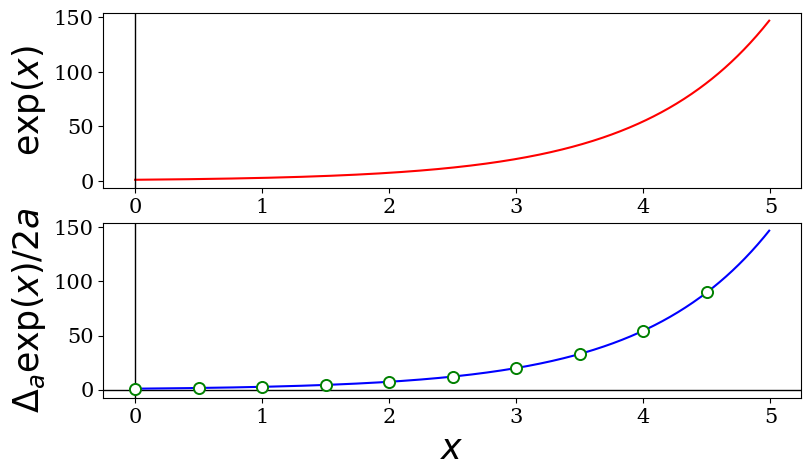

In [ ]:
#Exponential Function

# Calculate the derivative for exp(x)
dexp = fin_deriv(np.exp, x, a)

# Plot exp(x) and its derivative with error bars
ydata1 = np.exp(x)
ydata2 = dexp
ydata3 = np.exp(x2)
ylabel1 = r'$\exp(x)$'
ylabel2 = r'$\Delta_a \exp(x) / 2a$'
xlabel0 = r'$x$'

# Call the master plot function with the data
master_plot_vs_x(ydata1, ydata2, ydata3, ylabel1, ylabel2, xlabel0, x, x2)